In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,RMSprop,SGD
from keras.models import Model,load_model,Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
data_dir = "Data/"

In [4]:
covid_images = os.listdir(data_dir+"/Covid")
normal_images = os.listdir(data_dir+"/Normal")

In [6]:
def ploting():
    plt.figure(figsize=(20,20))
    index = random.randint(0,len(covid_images))
    normal_image = cv2.imread(data_dir+"/Normal/"+normal_images[index])
    normal_image = cv2.resize(normal_image,(224,224))
    covid_image = cv2.imread(data_dir+"/Covid/"+covid_images[index])
    covid_image = cv2.resize(covid_image,(224,224))
    fig,axes = plt.subplots(1,2,figsize=(20,20))
    axes = axes.ravel()
    axes[0].imshow(normal_image)
    axes[0].set_title("Normal X-ray")
    axes[1].imshow(covid_image)
    axes[1].set_title("Covid X-ray")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

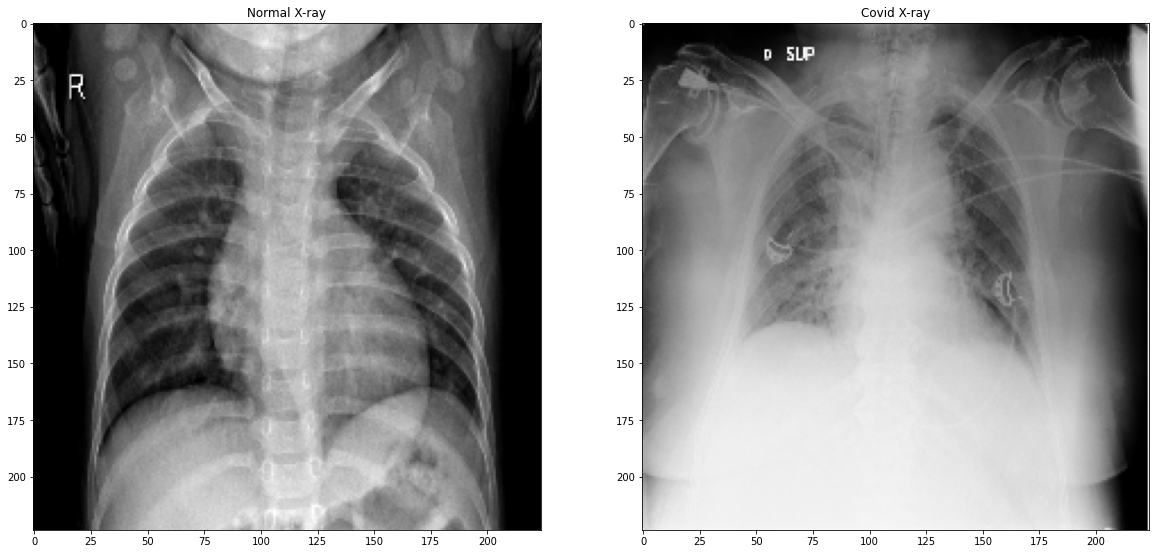

In [7]:
ploting()

In [9]:
data_map=[]
for sub_dir_path in glob.glob(data_dir+"*"):
    if os.path.isdir(sub_dir_path):
        dirname = str(sub_dir_path).split("\\")[-1]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + "/" + filename
            data_map.extend([dirname, image_path])

In [10]:
x = data_map[1::2]
y = data_map[0::2]
x[0]

'Data\\Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'

In [11]:
X = np.zeros((len(x),224,224,3),dtype=np.uint8)
Y = []

In [12]:
for n,i in enumerate(zip(x,y)):
    img = cv2.imread(i[0])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(224,224))
    X[n] = img
    Y.append(i[1])
Y = np.array(Y)
X=X/255

In [13]:
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
labels = to_categorical(labels)
print(labels)
x_train,x_test,y_train,y_test = train_test_split(X,labels,test_size=0.33,random_state=42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [17]:
img_rows = 224
img_cols = 224


vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))


for layer in vgg16.layers:
    layer.trainable = False
    
    
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [18]:
def addTopModel(bottom_model, num_classes, D=256):
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [19]:
num_classes = 2

FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
checkpoint = ModelCheckpoint("covid5.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr = 0.001),
              metrics = ['accuracy'])

epochs = 10
BS = 8

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=BS),steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=epochs,callbacks=[callbacks])



Epoch 1/10
16/16 [==============================] - 21s 1s/step - loss: 0.7482 - accuracy: 0.4929 - val_loss: 0.5439 - val_accuracy: 0.7727

Epoch 00001: val_loss improved from inf to 0.54394, saving model to covid5.h5
Epoch 2/10
16/16 [==============================] - 19s 1s/step - loss: 0.5689 - accuracy: 0.7244 - val_loss: 0.4687 - val_accuracy: 0.9545

Epoch 00002: val_loss improved from 0.54394 to 0.46868, saving model to covid5.h5
Epoch 3/10
16/16 [==============================] - 19s 1s/step - loss: 0.4810 - accuracy: 0.8612 - val_loss: 0.3865 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.46868 to 0.38650, saving model to covid5.h5
Epoch 4/10
16/16 [==============================] - 19s 1s/step - loss: 0.4119 - accuracy: 0.9117 - val_loss: 0.3581 - val_accuracy: 0.9545

Epoch 00004: val_loss improved from 0.38650 to 0.35808, saving model to covid5.h5
Epoch 5/10
16/16 [==============================] - 19s 1s/step - loss: 0.3834 - accuracy: 0.8977 - val_loss: 0.

In [24]:
history
# history

{'loss': [0.6963182091712952,
  0.5498228073120117,
  0.4677787721157074,
  0.40590864419937134,
  0.36349838972091675,
  0.3294270634651184,
  0.28579702973365784,
  0.2588402330875397,
  0.2358054220676422,
  0.21745897829532623],
 'accuracy': [0.5396825671195984,
  0.738095223903656,
  0.8650793433189392,
  0.9047619104385376,
  0.9126983880996704,
  0.9523809552192688,
  0.976190447807312,
  0.9841269850730896,
  0.9920634627342224,
  1.0],
 'val_loss': [0.5439376831054688,
  0.4686792492866516,
  0.38650453090667725,
  0.3580833077430725,
  0.3527112901210785,
  0.2648117244243622,
  0.23189593851566315,
  0.20855069160461426,
  0.1950206458568573,
  0.21190519630908966],
 'val_accuracy': [0.7727272510528564,
  0.9545454382896423,
  1.0,
  0.9545454382896423,
  0.939393937587738,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9848484992980957]}

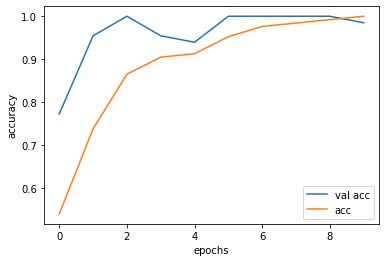

In [28]:
plt.plot(history['val_accuracy'],label="val acc")
plt.plot(history['accuracy'],label="acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.savefig("accuracy.png",dpi=300, bbox_inches='tight')

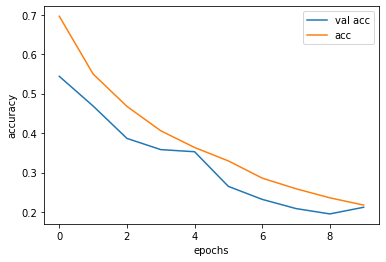

In [27]:
plt.plot(history['val_loss'],label="val acc")
plt.plot(history['loss'],label="acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.savefig("accuracy.png",dpi=300, bbox_inches='tight')

In [29]:
modelp = load_model("covid5.h5")

In [30]:
y_pred = modelp.predict(x_test,verbose=1)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

3/3 [==============================] - 6s 2s/step


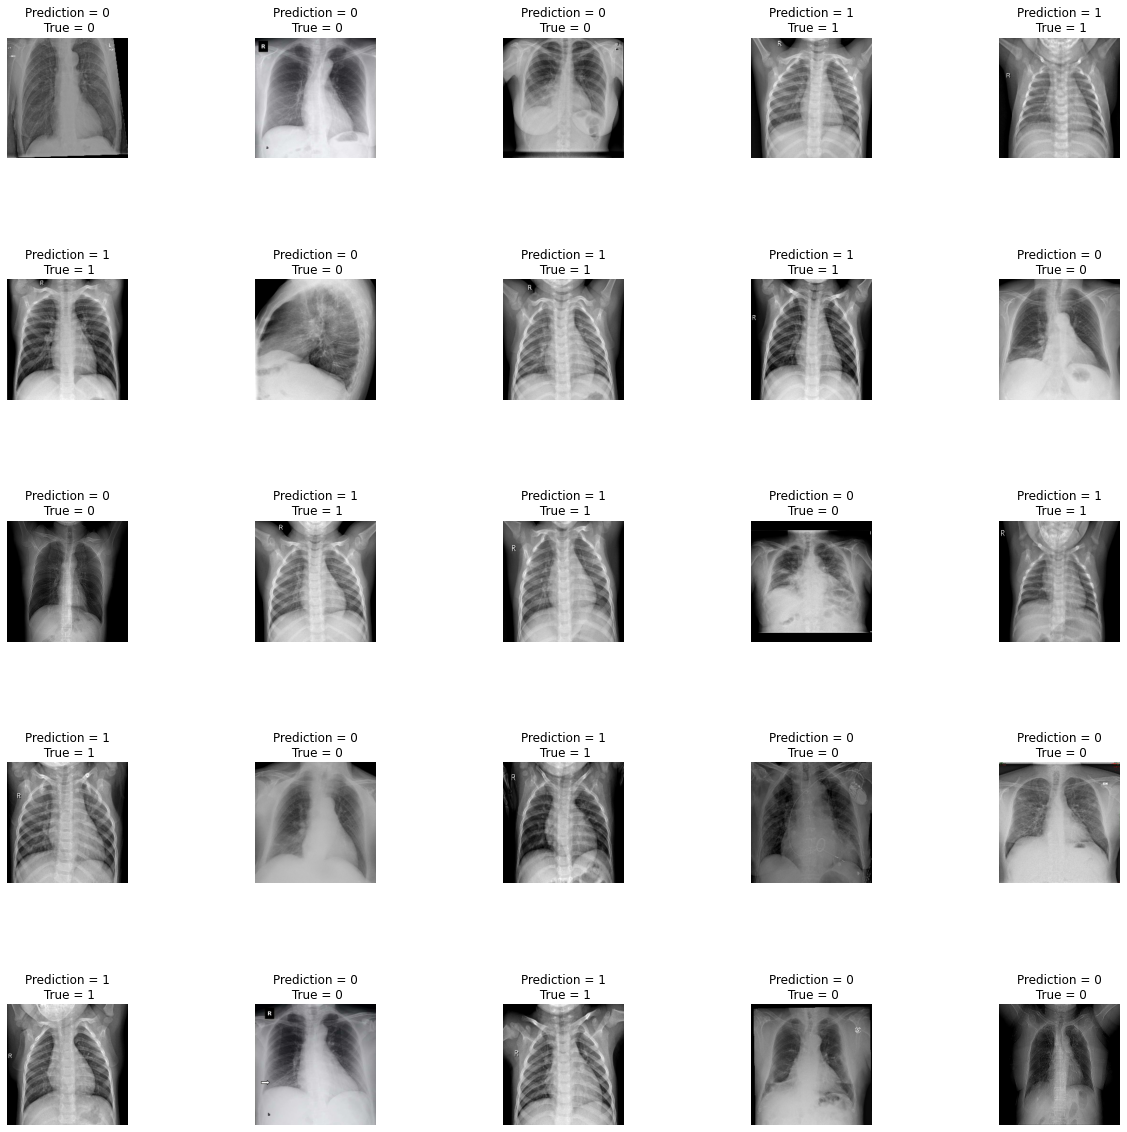

In [35]:
fig,axes = plt.subplots(nrows=5,ncols=5,figsize=(20,20))
axes = axes.ravel()
for i in range(5*5):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f'Prediction = {y_pred[i]}\n True = {y_test[i]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [32]:
print(accuracy_score(y_test,y_pred))

1.0


In [33]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

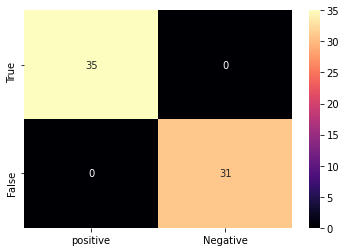

In [34]:
sns.heatmap(cm,annot=True,xticklabels=['positive','Negative'],yticklabels=['True','False'],cmap="magma")